In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [3]:

df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [4]:
print(df.shape[0],len(df.id.value_counts()))

3829 3829


In [6]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.368990384615387, 74.671593533487297)

In [7]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff # 1.3 days more after website change

1.3026031488719099

In [8]:
df.shape[0]

3829

In [9]:
# create sampling distribution of difference in average classroom times
# with boostrapping
size = df.shape[0]
diffs = []
for _ in range(10000):
    b_samp = df.sample(size, replace=True) # bootstrap
    control_mean = b_samp.query('group == "control"').total_days.mean()
    experiment_mean = b_samp.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)


(array([    5.,    42.,   332.,  1241.,  2587.,  2966.,  1887.,   759.,
          159.,    22.]),
 array([ -1.71018109e+00,  -1.14129540e+00,  -5.72409700e-01,
         -3.52400341e-03,   5.65361693e-01,   1.13424739e+00,
          1.70313309e+00,   2.27201878e+00,   2.84090448e+00,
          3.40979018e+00,   3.97867587e+00]),
 <a list of 10 Patch objects>)

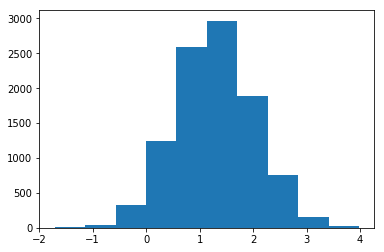

In [10]:
# convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs)

(array([  4.00000000e+01,   2.84000000e+02,   1.18000000e+03,
          2.49000000e+03,   3.02000000e+03,   2.04700000e+03,
          7.78000000e+02,   1.43000000e+02,   1.70000000e+01,
          1.00000000e+00]),
 array([-2.47976526, -1.90628735, -1.33280944, -0.75933154, -0.18585363,
         0.38762428,  0.96110218,  1.53458009,  2.108058  ,  2.6815359 ,
         3.25501381]),
 <a list of 10 Patch objects>)

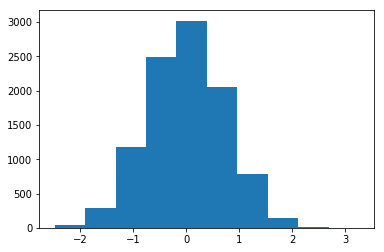

In [11]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 10000)

# Plot the null distribution
plt.hist(null_vals)

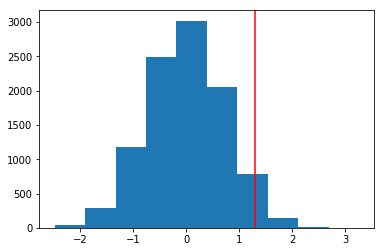

In [12]:
# Plot observed statistic with the null distibution

plt.hist(null_vals)
plt.axvline(x=obs_diff,color='red')


In [13]:
# compute p value
(null_vals>obs_diff).mean()   # rejecting null, probability is low<0.05 of 
# obs diff happened under null assumption

0.038399999999999997

In [ ]:
# this is not practically significant to change the website for a ~ 1 day tiem spent